λ110= -1.850815624219496e-05 	 ± 8.118927424702994e-07
y = a*cos(2x) + b*x + c
a= -1.388111718164622e-05
b= 3.233192310398157e-09
c= -9.423453619246828e-05


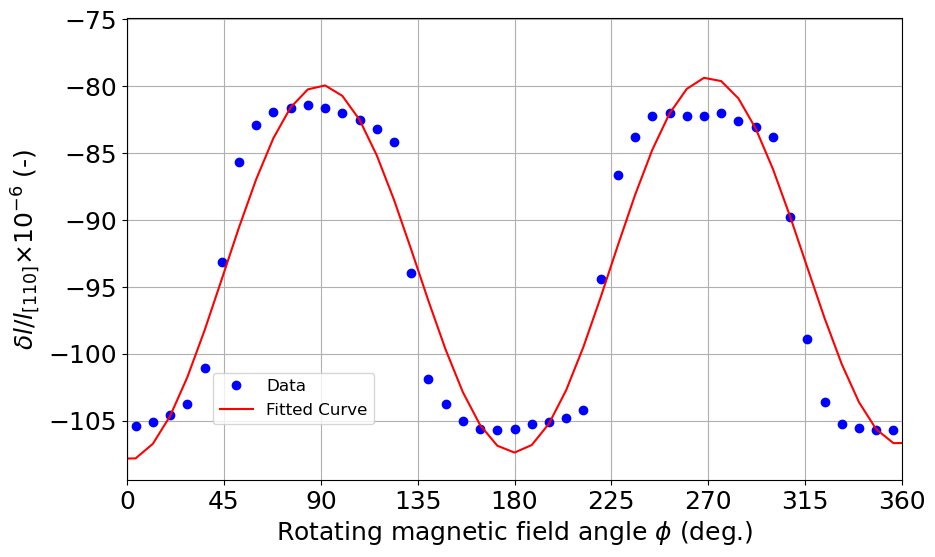

In [148]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#基板厚さ (um)
t = 500
#磁性膜厚 (um)
fi = 0.05
#スポット位置 (um)
p = 15000
#基板ヤング率 (Pa)
Es = 2.45E+11
#磁性膜ヤング率 (Pa)
Ef = 2.00E+11
#センサ位置 (um)
L = 891400
#薄膜ポアソン比
vf = 0.23
#基板ポアソン比
vs = 0.37

# データの読み込み
path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/磁歪測定_光てこ'

date='08192024'
Filename='202408191114_Ni_110'
filename='Ni_110-175.000000'

f=open(f'{path}/{date}/{Filename}/{filename}.csv','rt')
x_list=[]  #回転磁場角度 phi (deg)
y_list=[]  #

d = -55 #phi offset
n = 0

# フィッティング範囲の指定
x_min = 0  # 最小x値
x_max = 360 # 最大x値

# 最初の28行をスキップ
for i in range(28):
    next(f)

for line in f:
    data = line[:-1].split(',')
    try:
        x_raw = float(data[0]) + d
        y_raw = float(data[1]) 
        x_list.append(x_raw)
        y_list.append(y_raw)
    except ValueError:
        # 数値に変換できない行をスキップ
        continue

f.close()

x = np.array(x_list)
y = np.array(y_list)

yl = ((y*Es*t**2)*(1+vf)) / ((18*p*L*fi*Ef)*(1+vs))

# 指定範囲のデータを抽出
mask = (x >= x_min) & (x <= x_max)
x_data_fit = x[mask]
y_data_fit = yl[mask]

# フィッティング関数の定義
def fit_func(x, a, b ,c):
    return a*np.sin(2*x*np.pi/180) + b*x + c

# フィッティングの実行
popt, pcov = curve_fit(fit_func, x_data_fit, y_data_fit)
perr = np.sqrt(np.diag(pcov))

# フィッティング結果の取得
a_fit, b_fit, c_fit = popt

# 全範囲でフィッティングされた関数に基づくy値の計算
y_fit = fit_func(x, *popt)

#フィッティング結果
print('λ110=' , a_fit * 4/3 , '\t ±' ,perr[0] * 4/3 )
print('y = a*cos(2x) + b*x + c')
print('a=' , a_fit )
print('b=' , b_fit)
print('c=' , c_fit)

# 結果のプロット
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 6))
plt.plot(x  - 45, yl *10**6, 'bo', label='Data')
plt.plot(x - 45, y_fit *10**6, 'r-', label=f'Fitted Curve')
plt.xlabel('Rotating magnetic field angle $\phi$ (deg.)',fontsize=18)
plt.ylabel('$δl/l_\mathrm{[110]} × 10^{-6}$ (-)',fontsize=18)
plt.xticks(np.arange(x_min, x_max + 1, 45),fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(x_min , x_max)
plt.axvline( x=0 , ymin=0 , ymax=100  ,linestyle="-", color="black")
plt.legend(bbox_to_anchor=(0.1, 0.25), loc='upper left',fontsize=12)
plt.grid(True)
plt.show()